In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm

In [2]:
def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x + b)))

In [3]:
sigmoid(x = 1, w = 0.8, b = 0)

0.6899744811276125

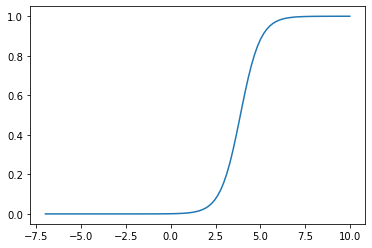

In [5]:
w = 1.8    #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = -7  #@param {type: "slider", min: -2, max: 2, step: 0.1}
X = np.linspace(-7,10,100)
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()


In [6]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [8]:
sigmoid_2d(1, 0, 0.7, 0, 0)

0.6681877721681662

In [9]:
X1 = np.linspace(-7, 10, 100)
X2 = np.linspace(-7, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [10]:
print(X1)

[-7.         -6.82828283 -6.65656566 -6.48484848 -6.31313131 -6.14141414
 -5.96969697 -5.7979798  -5.62626263 -5.45454545 -5.28282828 -5.11111111
 -4.93939394 -4.76767677 -4.5959596  -4.42424242 -4.25252525 -4.08080808
 -3.90909091 -3.73737374 -3.56565657 -3.39393939 -3.22222222 -3.05050505
 -2.87878788 -2.70707071 -2.53535354 -2.36363636 -2.19191919 -2.02020202
 -1.84848485 -1.67676768 -1.50505051 -1.33333333 -1.16161616 -0.98989899
 -0.81818182 -0.64646465 -0.47474747 -0.3030303  -0.13131313  0.04040404
  0.21212121  0.38383838  0.55555556  0.72727273  0.8989899   1.07070707
  1.24242424  1.41414141  1.58585859  1.75757576  1.92929293  2.1010101
  2.27272727  2.44444444  2.61616162  2.78787879  2.95959596  3.13131313
  3.3030303   3.47474747  3.64646465  3.81818182  3.98989899  4.16161616
  4.33333333  4.50505051  4.67676768  4.84848485  5.02020202  5.19191919
  5.36363636  5.53535354  5.70707071  5.87878788  6.05050505  6.22222222
  6.39393939  6.56565657  6.73737374  6.90909091  7.

In [11]:
print(XX1)

[[-7.         -6.82828283 -6.65656566 ...  9.65656566  9.82828283
  10.        ]
 [-7.         -6.82828283 -6.65656566 ...  9.65656566  9.82828283
  10.        ]
 [-7.         -6.82828283 -6.65656566 ...  9.65656566  9.82828283
  10.        ]
 ...
 [-7.         -6.82828283 -6.65656566 ...  9.65656566  9.82828283
  10.        ]
 [-7.         -6.82828283 -6.65656566 ...  9.65656566  9.82828283
  10.        ]
 [-7.         -6.82828283 -6.65656566 ...  9.65656566  9.82828283
  10.        ]]


In [13]:
w1 = -2
w2 = -0.7
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

In [14]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

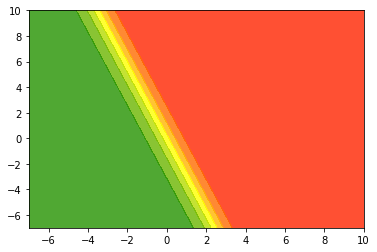

In [19]:
plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.8)
plt.show()

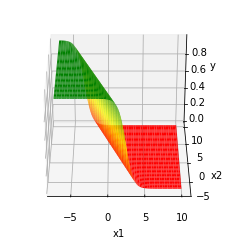

In [20]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap=my_cmap)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 270)


# Compute Loss for a Given Dataset

In [21]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

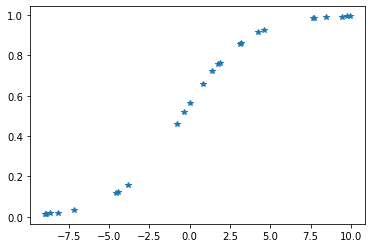

In [23]:
plt.plot(X, Y, '*')
plt.show()

In [24]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est))**2
  return loss

In [25]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [26]:
WW.shape

(101, 101)

In [28]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

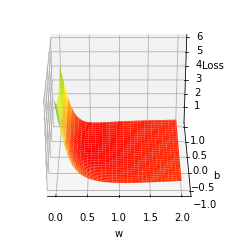

In [29]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap=my_cmap)
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30, 270)

In [30]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [31]:
print(i, j)

63 25


In [32]:
print(WW[i, j], BB[i, j])

0.5 0.26


# Class for Sigmoid Neuron

In [37]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y)*(y_pred) * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * y
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

# Fit for toy data

In [39]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [40]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

100%|████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 503.03epoch/s]


In [41]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap=my_cmap)
  ax.plot()

100%|█████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?epoch/s]


[[-0.14218793  1.17866614]] [0.00553237]


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?epoch/s]


[[0.37729646 0.99311895]] [0.0895701]


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?epoch/s]


[[0.90655033 0.72725677]] [0.16581959]


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?epoch/s]


[[1.02388732 0.39031365]] [0.23886762]


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?epoch/s]


[[ 1.11516387 -0.13018567]] [0.3377182]


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?epoch/s]

[[ 1.0755576 -0.5878343]] [0.34906953]



100%|████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 999.60epoch/s]


[[ 1.30777111 -0.22806184]] [0.36665929]


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?epoch/s]


[[ 1.26038685 -0.65598855]] [0.3711818]


100%|████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 998.88epoch/s]


[[ 1.4762514  -0.29848992]] [0.38192798]


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?epoch/s]


[[ 1.42540789 -0.71093154]] [0.38410303]


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?epoch/s]


[[ 1.62933092 -0.35980918]] [0.39076018]


100%|████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 998.88epoch/s]


[[ 1.57760396 -0.75645661]] [0.39190743]


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?epoch/s]


[[ 1.77057308 -0.41663576]] [0.39604311]


100%|████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 998.64epoch/s]


[[ 1.7200732 -0.7933959]] [0.39669082]


100%|████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 997.93epoch/s]


[[ 1.90087898 -0.47177733]] [0.39924721]


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?epoch/s]


[[ 1.85402626 -0.82160454]] [0.3996364]


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?epoch/s]


[[ 2.01989658 -0.52710507]] [0.4012016]


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?epoch/s]


[[ 1.97959852 -0.84040886]] [0.401452]


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?epoch/s]


[[ 2.12665292 -0.5837821 ]] [0.40239905]


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?epoch/s]


[[ 2.09621955 -0.84935073]] [0.40257377]


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?epoch/s]


[[ 2.22031656 -0.6419364 ]] [0.4031412]


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?epoch/s]


[[ 2.20293384 -0.84955829]] [0.40327493]


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?epoch/s]


[[ 2.30137449 -0.69985867]] [0.40361552]


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?epoch/s]

[[ 2.29889707 -0.84525146]] [0.40372722]



100%|█████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?epoch/s]


[[ 2.37256814 -0.7536507 ]] [0.40393742]


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?epoch/s]


[[ 2.38408864 -0.84301801]] [0.40403587]


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?epoch/s]


[[ 2.43800741 -0.7989923 ]] [0.40417369]


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?epoch/s]


[[ 2.45971417 -0.84772915]] [0.40426094]


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?epoch/s]


[[ 2.50073145 -0.83424858]] [0.40435862]


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?epoch/s]


[[ 2.52775429 -0.85962852]] [0.40443399]


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?epoch/s]


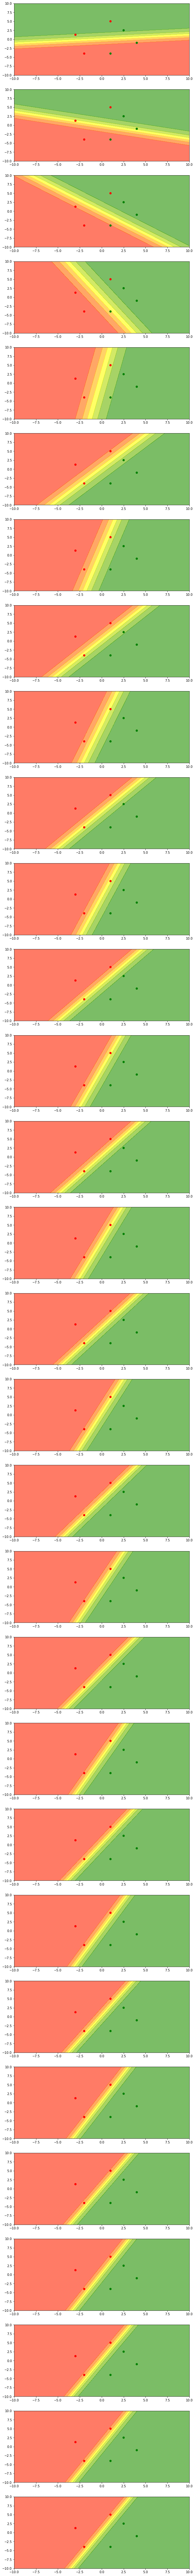

In [43]:
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.7, False)

In [51]:
data = pd.read_csv('result.csv')

In [52]:
data.head()

,reviewerID,asin,reviewerName,helpful__001,helpful__002,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1KLRMWW2FWPL4,31887,"Amazon Customer ""cameramom""",0,0,This is a great tutu and at a really great pri...,5,Great tutu- not cheaply made,1297468800,"02 12, 2011"
1,A2G5TCU2WDFZ65,31887,Amazon Customer,0,0,I bought this for my 4 yr old daughter for dan...,5,Very Cute!!,1358553600,"01 19, 2013"
2,A1RLQXYNCMWRWN,31887,Carola,0,0,What can I say... my daughters have it in oran...,5,I have buy more than one,1357257600,"01 4, 2013"
3,A8U3FAMSJVHS5,31887,Caromcg,0,0,"We bought several tutus at once, and they are ...",5,"Adorable, Sturdy",1398556800,"04 27, 2014"
4,A3GEOILWLK86XM,31887,CJ,0,0,Thank you Halo Heaven great product for Little...,5,Grammy's Angels Love it,1394841600,"03 15, 2014"


In [56]:
data.describe()

,helpful__001,helpful__002,overall,unixReviewTime
count,5001.000000,5001.000000,5001.000000,5.001000e+03
mean,1.253349,1.450510,4.327335,1.363103e+09
std,9.909571,10.433274,1.067066,4.482939e+07
min,0.000000,0.000000,1.000000,1.048896e+09
25%,0.000000,0.000000,4.000000,1.356394e+09
50%,0.000000,0.000000,5.000000,1.376266e+09
75%,1.000000,1.000000,5.000000,1.390262e+09
max,520.000000,537.000000,5.000000,1.405382e+09


In [57]:
X = data.drop('overall', axis=1)

In [58]:
Y = data['overall'].values

In [59]:
Y

array([5, 5, 5, ..., 5, 5, 3], dtype=int64)

In [60]:
threshold = 3
data['Class'] = (data['overall'] >= threshold).astype(np.int)

C:\Users\Admin\AppData\Local\Temp/ipykernel_24168/2510024897.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['Class'] = (data['overall'] >= threshold).astype(np.int)


In [61]:
data['Class'].value_counts(normalize=True)

1    0.912617
0    0.087383
Name: Class, dtype: float64

In [62]:
Y_binarised = data['Class'].values

# Standardisation

In [63]:
R = np.random.random([100, 1])

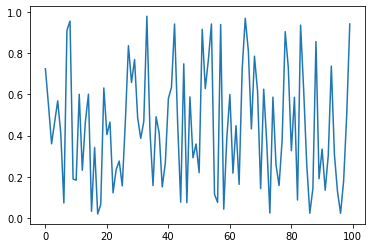

In [64]:
plt.plot(R)
plt.show()

In [65]:
np.mean(R)

0.44362579294423077

In [66]:
np.std(R)

0.28227488042105686

In [67]:
scaler = StandardScaler()

In [68]:
scaler.fit(R)

StandardScaler()

In [69]:
scaler.mean_

array([0.44362579])

In [70]:
RT = scaler.transform(R)

In [71]:
np.mean(RT)

-2.0872192862952942e-16

In [72]:
np.std(RT)

1.0

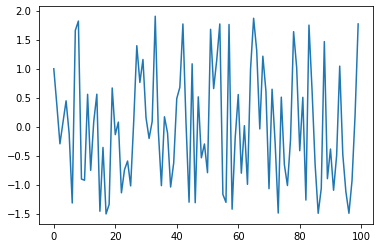

In [73]:
plt.plot(RT)
plt.show()

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, stratify=Y_binarised)

In [75]:
print(X_train.shape, X_test.shape)

(3750, 9) (1251, 9)


In [76]:
scaler = StandardScaler()

In [77]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'A2DWJZRG77NQG3'

In [78]:
minmax_scaler = MinMaxScaler()

In [79]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1, 1))

In [80]:
np.min(Y_scaled_train)

0.0

In [81]:
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1, 1))

In [82]:
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(1, -1)))[0][0]

In [83]:
scaled_threshold

0.5

In [84]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype("int").ravel()

In [85]:
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype("int").ravel()

# Train on Real Data

In [86]:
sn = SigmoidNeuron()

In [87]:
sn.fit(X_scaled_train, Y_scaled_train, epochs=2000, learning_rate=0.015, display_loss=False)

NameError: name 'X_scaled_train' is not defined

In [88]:
Y_pred_test = sn.predict(X_scaled_test)

NameError: name 'X_scaled_test' is not defined

In [89]:
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype("int").ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype("int").ravel()

NameError: name 'Y_pred_train' is not defined